In [11]:
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [12]:
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    return {'train': train_loader, 'test': test_loader}

In [13]:
class ZeroDLCnn(nn.Module):
    def __init__(self, num_classes=10):
        super(ZeroDLCnn, self).__init__()
        self.features = nn.Sequential(
            # kernel_size:畳み込む行列のサイズ
            # stride:スライドするときのサイズ
            # padding:上下左右に追加する空白
            # 1*28*28 のデータ
            nn.Conv2d(1, 30, kernel_size=5, stride=1, padding=0), # 1*28*28 => 30*24*24
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), #30*24*24 => 30*12*12
        )
            
        self.classifier = nn.Sequential(
            nn.Linear(30*12*12, 30*12*12),
            nn.ReLU(inplace=True),
            nn.Linear(30*12*12, 10),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [14]:
num_epoch = 20
history = {
    'train_loss':[],
    'test_loss':[],
    'test_acc':[]
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = ZeroDLCnn().to(device)
loaders = load_MNIST()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [15]:
for i_epoch in range(num_epoch):
    loss = None
    
    net.train(True)
    
    for i, (data, target) in enumerate(loaders['train']):
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        output = net(data)
        
#         print(output.shape)
        
#         loss = f.nll_loss(output, target)
        loss = criterion(output, target)
    
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(i_epoch+1, (i+1)*128, loss.item()))
    
    history['train_loss'].append(loss.item())
    
    net.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.to(device)
            target = target.to(device)
            
            output = net(data)
            loss = criterion(output, target)
#             test_loss += f.nll_loss(output, target, reduction='sum').item()
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= 10000
    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss, correct / 10000))
    
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)

Training log: 1 epoch (128 / 60000 train. data). Loss: 2.3028454780578613
Training log: 1 epoch (1408 / 60000 train. data). Loss: 1.9706215858459473
Training log: 1 epoch (2688 / 60000 train. data). Loss: 1.8114593029022217
Training log: 1 epoch (3968 / 60000 train. data). Loss: 1.7521766424179077
Training log: 1 epoch (5248 / 60000 train. data). Loss: 1.7253754138946533
Training log: 1 epoch (6528 / 60000 train. data). Loss: 1.7517757415771484
Training log: 1 epoch (7808 / 60000 train. data). Loss: 1.6752127408981323
Training log: 1 epoch (9088 / 60000 train. data). Loss: 1.6969773769378662
Training log: 1 epoch (10368 / 60000 train. data). Loss: 1.755406141281128
Training log: 1 epoch (11648 / 60000 train. data). Loss: 1.6106853485107422
Training log: 1 epoch (12928 / 60000 train. data). Loss: 1.666837453842163
Training log: 1 epoch (14208 / 60000 train. data). Loss: 1.638575553894043
Training log: 1 epoch (15488 / 60000 train. data). Loss: 1.5992403030395508
Training log: 1 epoch (1

Training log: 3 epoch (18048 / 60000 train. data). Loss: 1.470085620880127
Training log: 3 epoch (19328 / 60000 train. data). Loss: 1.485600471496582
Training log: 3 epoch (20608 / 60000 train. data). Loss: 1.4735212326049805
Training log: 3 epoch (21888 / 60000 train. data). Loss: 1.4769343137741089
Training log: 3 epoch (23168 / 60000 train. data). Loss: 1.4815514087677002
Training log: 3 epoch (24448 / 60000 train. data). Loss: 1.4711551666259766
Training log: 3 epoch (25728 / 60000 train. data). Loss: 1.493294596672058
Training log: 3 epoch (27008 / 60000 train. data). Loss: 1.4837238788604736
Training log: 3 epoch (28288 / 60000 train. data). Loss: 1.4892480373382568
Training log: 3 epoch (29568 / 60000 train. data). Loss: 1.474858283996582
Training log: 3 epoch (30848 / 60000 train. data). Loss: 1.4830831289291382
Training log: 3 epoch (32128 / 60000 train. data). Loss: 1.473541498184204
Training log: 3 epoch (33408 / 60000 train. data). Loss: 1.4883242845535278
Training log: 3 e

Training log: 5 epoch (34688 / 60000 train. data). Loss: 1.4796512126922607
Training log: 5 epoch (35968 / 60000 train. data). Loss: 1.4698057174682617
Training log: 5 epoch (37248 / 60000 train. data). Loss: 1.5074025392532349
Training log: 5 epoch (38528 / 60000 train. data). Loss: 1.4704586267471313
Training log: 5 epoch (39808 / 60000 train. data). Loss: 1.468669056892395
Training log: 5 epoch (41088 / 60000 train. data). Loss: 1.468674898147583
Training log: 5 epoch (42368 / 60000 train. data). Loss: 1.4774123430252075
Training log: 5 epoch (43648 / 60000 train. data). Loss: 1.47038733959198
Training log: 5 epoch (44928 / 60000 train. data). Loss: 1.4690706729888916
Training log: 5 epoch (46208 / 60000 train. data). Loss: 1.4696643352508545
Training log: 5 epoch (47488 / 60000 train. data). Loss: 1.4899685382843018
Training log: 5 epoch (48768 / 60000 train. data). Loss: 1.4819477796554565
Training log: 5 epoch (50048 / 60000 train. data). Loss: 1.4683398008346558
Training log: 5 

Training log: 7 epoch (51328 / 60000 train. data). Loss: 1.4611531496047974
Training log: 7 epoch (52608 / 60000 train. data). Loss: 1.4689972400665283
Training log: 7 epoch (53888 / 60000 train. data). Loss: 1.4767639636993408
Training log: 7 epoch (55168 / 60000 train. data). Loss: 1.4704238176345825
Training log: 7 epoch (56448 / 60000 train. data). Loss: 1.4611541032791138
Training log: 7 epoch (57728 / 60000 train. data). Loss: 1.4757914543151855
Training log: 7 epoch (59008 / 60000 train. data). Loss: 1.4620795249938965
Test loss (avg): 0.011646606171131134, Accuracy: 0.9872
Training log: 8 epoch (128 / 60000 train. data). Loss: 1.461151361465454
Training log: 8 epoch (1408 / 60000 train. data). Loss: 1.4613784551620483
Training log: 8 epoch (2688 / 60000 train. data). Loss: 1.46894109249115
Training log: 8 epoch (3968 / 60000 train. data). Loss: 1.4612032175064087
Training log: 8 epoch (5248 / 60000 train. data). Loss: 1.469003438949585
Training log: 8 epoch (6528 / 60000 train.

Training log: 10 epoch (7808 / 60000 train. data). Loss: 1.4686193466186523
Training log: 10 epoch (9088 / 60000 train. data). Loss: 1.471354603767395
Training log: 10 epoch (10368 / 60000 train. data). Loss: 1.4698835611343384
Training log: 10 epoch (11648 / 60000 train. data). Loss: 1.468919277191162
Training log: 10 epoch (12928 / 60000 train. data). Loss: 1.4680036306381226
Training log: 10 epoch (14208 / 60000 train. data). Loss: 1.4751436710357666
Training log: 10 epoch (15488 / 60000 train. data). Loss: 1.4621775150299072
Training log: 10 epoch (16768 / 60000 train. data). Loss: 1.462120532989502
Training log: 10 epoch (18048 / 60000 train. data). Loss: 1.483266830444336
Training log: 10 epoch (19328 / 60000 train. data). Loss: 1.4611577987670898
Training log: 10 epoch (20608 / 60000 train. data). Loss: 1.4877843856811523
Training log: 10 epoch (21888 / 60000 train. data). Loss: 1.462991714477539
Training log: 10 epoch (23168 / 60000 train. data). Loss: 1.4771534204483032
Traini

Training log: 12 epoch (23168 / 60000 train. data). Loss: 1.4830989837646484
Training log: 12 epoch (24448 / 60000 train. data). Loss: 1.46132493019104
Training log: 12 epoch (25728 / 60000 train. data). Loss: 1.471467137336731
Training log: 12 epoch (27008 / 60000 train. data). Loss: 1.4689644575119019
Training log: 12 epoch (28288 / 60000 train. data). Loss: 1.476303219795227
Training log: 12 epoch (29568 / 60000 train. data). Loss: 1.467045783996582
Training log: 12 epoch (30848 / 60000 train. data). Loss: 1.4845528602600098
Training log: 12 epoch (32128 / 60000 train. data). Loss: 1.4705098867416382
Training log: 12 epoch (33408 / 60000 train. data). Loss: 1.468806505203247
Training log: 12 epoch (34688 / 60000 train. data). Loss: 1.476833462715149
Training log: 12 epoch (35968 / 60000 train. data). Loss: 1.4639543294906616
Training log: 12 epoch (37248 / 60000 train. data). Loss: 1.4611518383026123
Training log: 12 epoch (38528 / 60000 train. data). Loss: 1.4711859226226807
Traini

Training log: 14 epoch (38528 / 60000 train. data). Loss: 1.4639580249786377
Training log: 14 epoch (39808 / 60000 train. data). Loss: 1.4677749872207642
Training log: 14 epoch (41088 / 60000 train. data). Loss: 1.4621386528015137
Training log: 14 epoch (42368 / 60000 train. data). Loss: 1.4615402221679688
Training log: 14 epoch (43648 / 60000 train. data). Loss: 1.474478006362915
Training log: 14 epoch (44928 / 60000 train. data). Loss: 1.4611507654190063
Training log: 14 epoch (46208 / 60000 train. data). Loss: 1.4641741514205933
Training log: 14 epoch (47488 / 60000 train. data). Loss: 1.4611554145812988
Training log: 14 epoch (48768 / 60000 train. data). Loss: 1.4689648151397705
Training log: 14 epoch (50048 / 60000 train. data). Loss: 1.4613611698150635
Training log: 14 epoch (51328 / 60000 train. data). Loss: 1.4713462591171265
Training log: 14 epoch (52608 / 60000 train. data). Loss: 1.4614038467407227
Training log: 14 epoch (53888 / 60000 train. data). Loss: 1.461188793182373
T

Training log: 16 epoch (53888 / 60000 train. data). Loss: 1.46159029006958
Training log: 16 epoch (55168 / 60000 train. data). Loss: 1.4611507654190063
Training log: 16 epoch (56448 / 60000 train. data). Loss: 1.4611507654190063
Training log: 16 epoch (57728 / 60000 train. data). Loss: 1.4767643213272095
Training log: 16 epoch (59008 / 60000 train. data). Loss: 1.4671745300292969
Test loss (avg): 0.011663127517700196, Accuracy: 0.9845
Training log: 17 epoch (128 / 60000 train. data). Loss: 1.476001501083374
Training log: 17 epoch (1408 / 60000 train. data). Loss: 1.4611507654190063
Training log: 17 epoch (2688 / 60000 train. data). Loss: 1.4611530303955078
Training log: 17 epoch (3968 / 60000 train. data). Loss: 1.4611507654190063
Training log: 17 epoch (5248 / 60000 train. data). Loss: 1.4689632654190063
Training log: 17 epoch (6528 / 60000 train. data). Loss: 1.4611507654190063
Training log: 17 epoch (7808 / 60000 train. data). Loss: 1.4611530303955078
Training log: 17 epoch (9088 / 

Training log: 19 epoch (7808 / 60000 train. data). Loss: 1.4611598253250122
Training log: 19 epoch (9088 / 60000 train. data). Loss: 1.461150884628296
Training log: 19 epoch (10368 / 60000 train. data). Loss: 1.462211012840271
Training log: 19 epoch (11648 / 60000 train. data). Loss: 1.4611510038375854
Training log: 19 epoch (12928 / 60000 train. data). Loss: 1.4689642190933228
Training log: 19 epoch (14208 / 60000 train. data). Loss: 1.4680237770080566
Training log: 19 epoch (15488 / 60000 train. data). Loss: 1.4764125347137451
Training log: 19 epoch (16768 / 60000 train. data). Loss: 1.4611750841140747
Training log: 19 epoch (18048 / 60000 train. data). Loss: 1.4690555334091187
Training log: 19 epoch (19328 / 60000 train. data). Loss: 1.4611549377441406
Training log: 19 epoch (20608 / 60000 train. data). Loss: 1.470973253250122
Training log: 19 epoch (21888 / 60000 train. data). Loss: 1.4611507654190063
Training log: 19 epoch (23168 / 60000 train. data). Loss: 1.4689632654190063
Trai

{'train_loss': [1.4981040954589844, 1.485031008720398, 1.467021107673645, 1.4827076196670532, 1.4611520767211914, 1.4818629026412964, 1.4726911783218384, 1.470118522644043, 1.4715527296066284, 1.4613404273986816, 1.4756399393081665, 1.467373251914978, 1.4629465341567993, 1.4734553098678589, 1.470405101776123, 1.4611841440200806, 1.4700579643249512, 1.4612990617752075, 1.4611567258834839, 1.4611505270004272], 'test_loss': [0.011788892793655395, 0.011711004602909088, 0.011660100686550141, 0.011666324365139008, 0.011649852967262267, 0.011662299585342407, 0.011646606171131134, 0.01163369289636612, 0.01162231525182724, 0.011644085478782654, 0.01165306967496872, 0.011665533518791198, 0.011630427920818328, 0.011632091116905212, 0.011633664107322693, 0.011663127517700196, 0.011635925495624541, 0.011641063368320465, 0.01162559494972229, 0.011630372655391694], 'test_acc': [0.9714, 0.9803, 0.9855, 0.9845, 0.9866, 0.9848, 0.9872, 0.9885, 0.9895, 0.9878, 0.9857, 0.9846, 0.989, 0.9884, 0.9883, 0.984

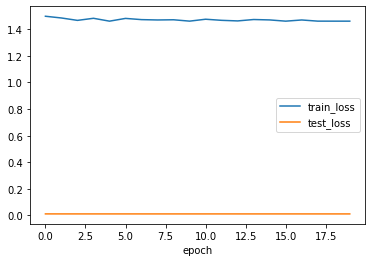

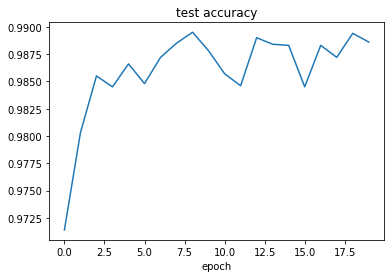

In [16]:
num_epoch
print(history)
plt.figure()
plt.plot(range(len(history['train_loss'])), history['train_loss'], label='train_loss')
plt.plot(range(len(history['test_loss'])), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('cnnloss.png')

plt.figure()
plt.plot(range(len(history['test_acc'])), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('cnn_test_acc2.png')